# Part I - Prosper Loan Data Exploration
## by Olumide Olaoye

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Variable Description
Some of the variables are described below:

- Term: The length of the loan expressed in months.

- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.

- BorrowerRate: The Borrower's interest rate for this loan.

- ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

- EmploymentStatus: The employment status of the borrower at the time they posted the listing.

- DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

- StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.


## Preliminary Wrangling

> I did a bit of wrangling to get the data ready for exploration


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in the csv file
prosper = pd.read_csv('C:\\Users\\user\\Downloads\\ALX-T Udacity Nanodegree materials\\prosperLoanData.csv')
print(prosper.shape)
print(prosper.head())

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18

In [3]:
# Check the data types of the features
prosper.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [4]:
prosper.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 
        'ProsperRating (Alpha)', 'EmploymentStatus']  
prosper_sub = prosper[cols]

In [6]:
# View the first 55 rows of the dataset
prosper_sub.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed


In [7]:
# Check for null values in 'BorrowerAPR'
prosper_sub['BorrowerAPR'].isnull().sum()

25

In [8]:
# Remove loans with missing borrower APR information
prosper_sub = prosper_sub[~prosper_sub['BorrowerAPR'].isnull()]

In [9]:
# Information about the dataset of interest
prosper_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113912 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   StatedMonthlyIncome    113912 non-null  float64
 3   Term                   113912 non-null  int64  
 4   ProsperRating (Alpha)  84853 non-null   object 
 5   EmploymentStatus       111682 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 6.1+ MB


In [10]:
# Dimension of prosper_sub df
prosper_sub.shape

(113912, 6)

In [11]:
# Descriptive statistics for numeric variables of interest
prosper_sub.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term
count,113912.000000,113912.000000,1.139120e+05,113912.000000
mean,8338.015661,0.218828,5.606973e+03,40.831308
std,6245.940592,0.080364,7.478338e+03,10.437112
min,1000.000000,0.006530,0.000000e+00,12.000000
25%,4000.000000,0.156290,3.200000e+03,36.000000
50%,6500.000000,0.209760,4.666667e+03,36.000000
75%,12000.000000,0.283810,6.817083e+03,36.000000
max,35000.000000,0.512290,1.750003e+06,60.000000


### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

> I'm very interested in figuring out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the LoanOriginalAmount will have a negative effect on the BorrowerAPR of the loan: the larger the LoanOriginalAmount, the lower the BorrowerAPR. 

> I also want to believe that the borrowers StatedMonthlyIncome, loan term (Term), ProsperRating (Alpha), and EmploymentStatus will also have effects on the BorrowerAPR.

## Univariate Exploration

I will start by looking at the ditribution of 'BorrowerAPR' which is the main variable of interest

Text(0.5, 0, 'BorrowerAPR')

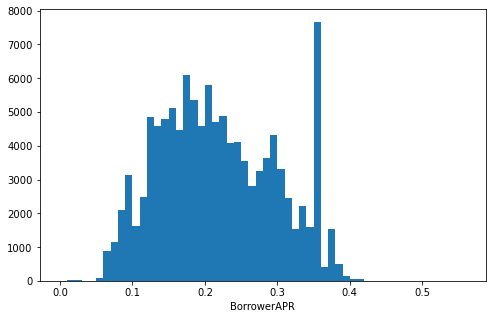

In [12]:
bins = np.arange(0, prosper_sub['BorrowerAPR'].max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('BorrowerAPR')

The distribution of APR is multimodal. There are small peaks centered at 0.1 and 0.3. A large peak is centered at 0.2. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

In [13]:
# Check loans with APR greater than 0.43 and sort by 'BorrowerAPR' descending
prosper_sub[prosper_sub['BorrowerAPR'] > 0.43].sort_values('BorrowerAPR', axis = 0, ascending=False)

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
36018,1500,0.51229,2838.000000,36,NaN,NaN
56761,3000,0.50633,0.000000,36,NaN,NaN
82043,3000,0.48873,1583.333333,36,NaN,NaN
22195,1789,0.46201,2916.666667,36,NaN,NaN
18326,3000,0.45857,10000.000000,36,NaN,NaN
103973,2800,0.45857,3750.000000,36,NaN,NaN


The 6 borrowers with largest APR have small loan amount and don't have records of ProsperRating and EmploymentStatus.

The next thing is I will check the distribution of the first predictor variable of interest: 'LoanOriginalAmount'

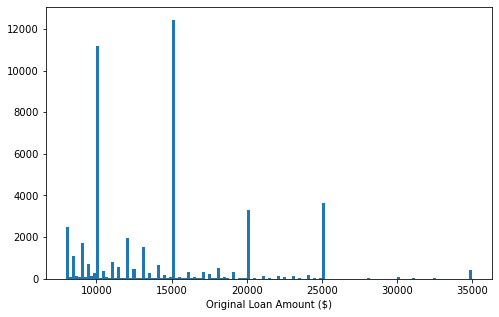

In [14]:
bins = np.arange(8000, prosper_sub['LoanOriginalAmount'].max()+200, 200)
plt.figure(figsize = [8, 5])
plt.hist(prosper_sub['LoanOriginalAmount'], bins = bins);
plt.xlabel('Original Loan Amount ($)');

The very high spikes in frequency are at 10k, 15k, 20k, 25k and 35k. There are also small spikes at 8k, 9k, 11k, 12k, 13k, 14k etc. It means that most of the loans are multiples of 1k.

I will now look at the distributions of the other variables of interest in this order: 'StatedMonthlyIncome', 'Term', 'ProsperRating', 'DebtToIncomeRatio', and 'BorrowerState'

Stated Monthly Income

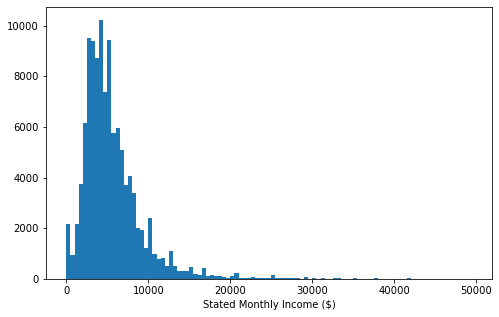

In [15]:
bins = np.arange(0, 50000, 500)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_sub, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Stated Monthly Income ($)');

- The distribution of StatedMonthlyIncome is highly right skewed, with most of the StatedMonthlyIncome less than 30k

In [16]:
# Query borrowers with stated monthly income greater than 1e5
prosper_sub[prosper_sub['StatedMonthlyIncome'] > 1e5]

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
8066,2000,0.35643,4.166667e+05,36,HR,Employed
8870,12500,0.12700,2.083333e+05,36,NaN,Not available
17411,7500,0.35643,4.833333e+05,36,E,Employed
35218,1000,0.07389,1.083333e+05,36,AA,Full-time
45028,4000,0.33973,1.500000e+05,36,E,Self-employed
53014,4000,0.25785,6.185478e+05,12,D,Self-employed
53167,4000,0.35797,1.750003e+06,36,HR,Self-employed
56867,25000,0.11144,1.850818e+05,36,NaN,Self-employed
57133,4000,0.35643,4.666667e+05,36,E,Employed
59298,15000,0.24246,1.208333e+05,36,C,Self-employed


In [17]:
# Get percent of borrowers whose stated monthly income is greater than 30k
(prosper_sub['StatedMonthlyIncome'] > 30000).sum() / float(prosper_sub.shape[0])

0.0028706369829341947

Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seemed as outliers for the analysis, so it is better to remove borrower records with income greater than 30k.

In [18]:
# Filter out loans with Stated Monthly income less than or equal to 30k
# to remove borrower records with income greater than 30k
prosper_sub = prosper_sub[prosper_sub.StatedMonthlyIncome <=30000]

In [19]:
# Check for any records of loans with Stated Monthly Income greater than 30k
(prosper_sub.StatedMonthlyIncome > 30000).sum()

0

Check for the distributions of Term, ProsperRating, and EmploymentStatus

In [20]:
# Get the unique values of 'ProsperRating'
prosper_sub['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [21]:
# Convert ProsperRating from string to ordered categorical type
rate_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=rate_order)
prosper_sub['ProsperRating (Alpha)'] = prosper_sub['ProsperRating (Alpha)'].astype(ordered_var)

In [22]:
# Get the unique values of 'EmploymentStatus'
prosper_sub['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [23]:
# Convert EmploymentStatus from string to ordered categorical type
emp_order = ['Employed', 'Self-employed', 'Full-time', 'Part-time', 'Retired', 'Other', 'Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=emp_order)
prosper_sub['EmploymentStatus'] = prosper_sub['EmploymentStatus'].astype(ordered_var)

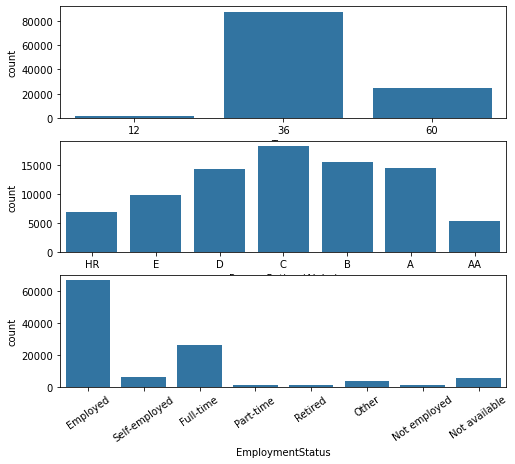

In [24]:
fig, ax = plt.subplots(nrows=3, figsize=[8,7])
base_color = sns.color_palette()[0]
sns.countplot(data = prosper_sub, x = 'Term', color = base_color, ax = ax[0])
sns.countplot(data = prosper_sub, x = 'ProsperRating (Alpha)', color = base_color, ax = ax[1])
sns.countplot(data = prosper_sub, x = 'EmploymentStatus', color = base_color, ax = ax[2]);
plt.xticks(rotation = 35);

- The terms of most of the loans are 36 months. 

- The ratings of most of the borrowers are among D to A. 

- Most of the borrowers are employed and full-time.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of BorrowersAPR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of StatedMonthlyIncome is screwed to the right. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 10k. Surprisingly, most of borrowers with greater than 10k monthly income only loan less than 5k dollars. So, the very large StatedMonthlyIncome may be made up. Overall, Less than 0.3 percent borrowers have StatedMonthlyIncome greater than 30k, these can be seemed as outlier for the analysis, so it is better to remove borrower records with income greater than 30k. Also, there is no need to perform any transformations.

## Bivariate Exploration

I will start by looking at the pairwise correlations between numeric and categorical features in the data

In [25]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

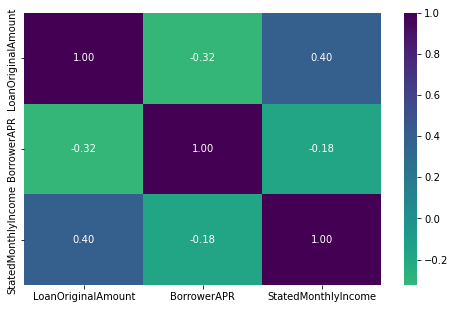

In [26]:
# Plotting the correlation
plt.figure(figsize=[8,5])
sns.heatmap(prosper_sub[num_vars].corr(), annot=True, fmt='.2f',
           cmap='viridis_r', center=0);

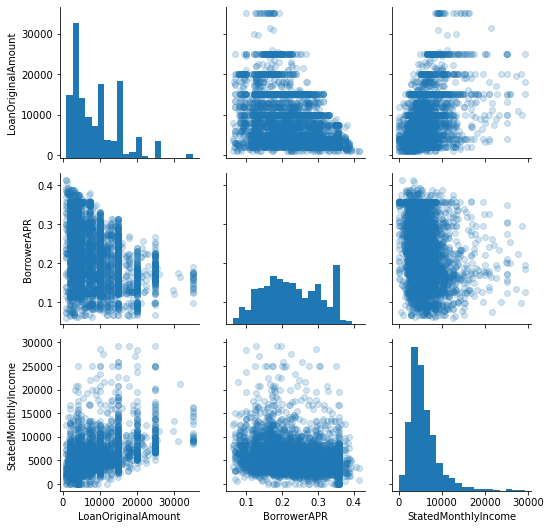

In [27]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
prosper_sub_samp = prosper_sub.sample(5000)
g = sns.PairGrid(data = prosper_sub_samp.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

- There's a negative correlation between LoanOriginalAmount and BorrowerAPR as indicated by the negative value in the heatmap. The correlation coefficient of BorrowerAPR and LoanOriginalAmount is -0.32, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR.

- There's a positive correlation of 0.40 between LoanOriginalAmount and StatedMonthlyIncome as shown in the heatmap. The LoanOriginalAmount is positively correlated with the StatedMonthlyIncome. This makes sense since borrowers with more monthly income could loan more money.

- There's also a negative correlation between BorrowerAPR and StatedMonthlyIncome as displayed in the heatmap. Thd more monthly income a person collects, the less likely he would be open to borrow.

Next is to look at how BorrowerAPR, StatedMonthlyIncome and LoanOriginalAmount correlate with the categorical variables.

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the 

<Figure size 576x576 with 0 Axes>

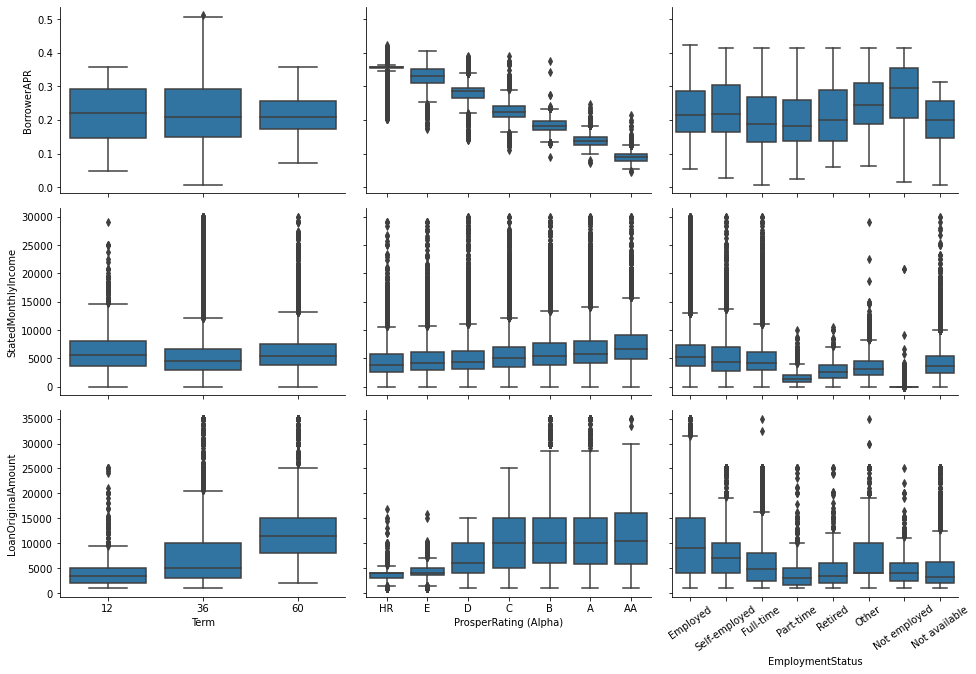

In [28]:
# plot matrix of numeric features against categorical features

def boxgrid(x, y, **kwargs):
    """Quick hack for creating box plots with seaborn's PairGrid."""
    base_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = base_color);
    
plt.figure(figsize=[8,8])
g = sns.PairGrid(data = prosper_sub, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'],
                x_vars = cat_vars, size = 3, aspect = 1.5);
g.map(boxgrid);
plt.xticks(rotation=35);

The figure above shows that:

- The LoanOriginalAmount is increased with the increase of loan term (Term). 

- The BorrowerAPR decreases with the better rating (ProsperRating (Alpha)). Borrowers with the best ProsperRatings have the lowest APR. It means that the ProsperRating (Alpha) has a strong effect on BorrowerAPR. 

- Borrowers with better rating also have larger monthly income and loan amount. 

- Employed, self-employed and full time borrowers have more monthly income and loan amount than Part-time, Retired and Not employed borrowers.

Lastly, I'll take a look at the relationships among the 3 categorical variables

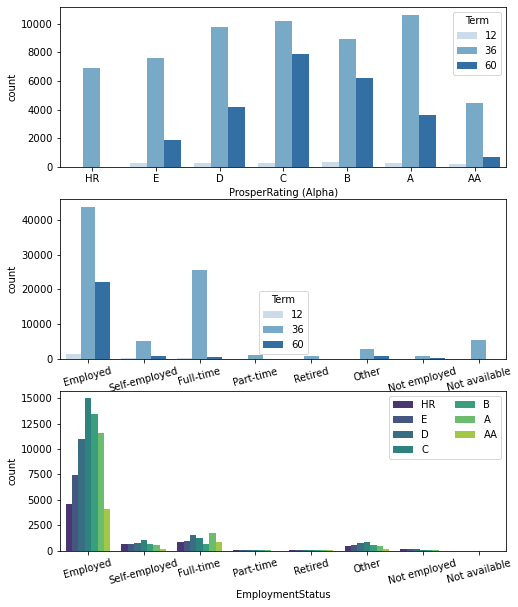

In [29]:
plt.figure(figsize=[8, 10])

# subplot 1: ProsperRating (Alpha) vs Term
plt.subplot(3, 1, 1)
sns.countplot(data = prosper_sub, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues');

# subplot 2: EmploymentStatus vs Term
ax = plt.subplot(3, 1, 2)
sns.countplot(data = prosper_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues');
plt.xticks(rotation=15);

# subplot 3: EmploymentStatus vs ProsperRating
ax = plt.subplot(3, 1, 3)
sns.countplot(data = prosper_sub, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'viridis');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=15);

- The EmploymentStatus variable do not have enough data on Part-time, Retired and Not-employed borrowers to show its interaction with Term and ProsperRating variables. 

- Contrariwise,  we can see that there is an interaction between Term and ProsperRating (Alpha). By proportion, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

Next, I want to look at the relationship between the BorrowerAPR and LoanOriginalAmount across all the data with the regression plot

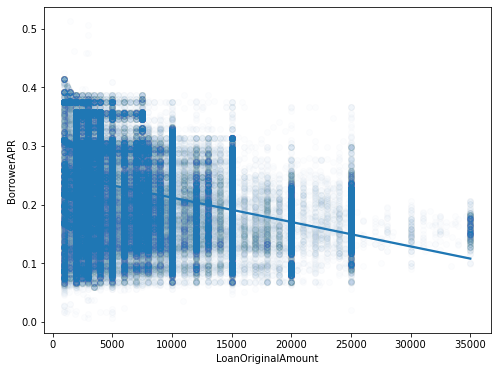

In [30]:
plt.figure(figsize=[8,6])
sns.regplot(data = prosper_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws = {'alpha':0.01});

- The regression plot shows that at different size of the LoanOriginalAmount, the BorrowerAPR has a large range, but the range of BorrowerAPR decreases with increase in LoanOriginalAmount. 

- In all, the BorrowerAPR has a negative correlation with the LoanOriginalAmount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The BorrowerAPR is negatively correlated with the LoanOriginalAmount, that is, the more the LoanOriginalAmount, the lower the BorrowerAPR.

- The ProsperRating (Alpha) also has great effect on the BorrowerAPR, which means the BorrowerAPR decreases with higher ProsperRating (Alpha)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The LoanOriginalAmount is positively correlated to the StatedMonthlyIncome. This means that the more disposable monthly income a person has, the more loans he can afford to give out. It also shows that borrowers with better rating also have larger monthly income and loan amount. 

- There is an interaction between ProsperRating (alpha) and Term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

## Multivariate Exploration

The multivariate exploration will explore how the categorical variables(Prosper Rating (Alpha) and Term) would play in relationship between BorrowerAPR and LoanOriginalAmount

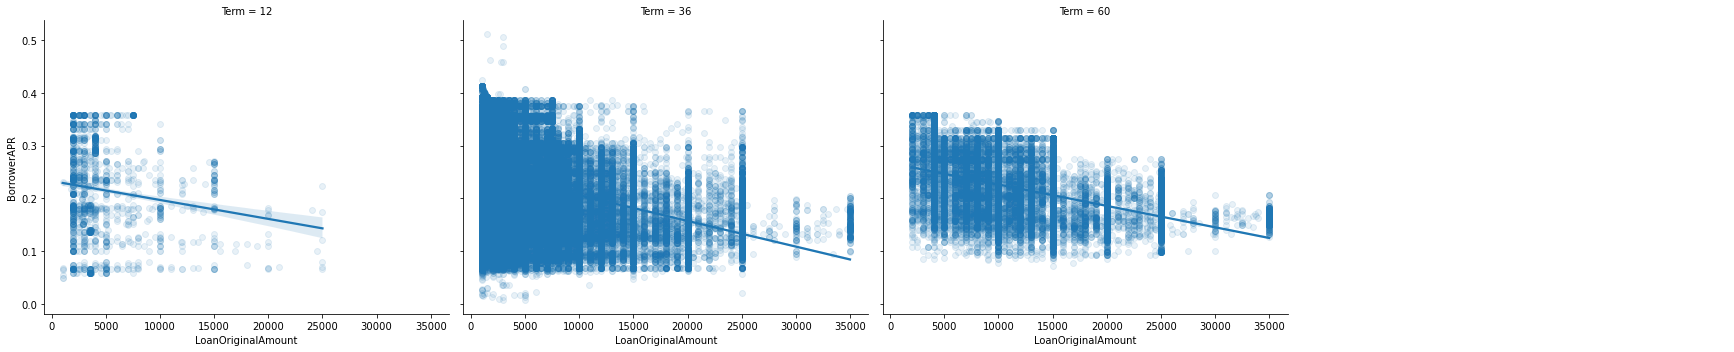

In [31]:
# Effect of Term on relationship of BorrowerAPR and LoanOriginalAmount
g = sns.FacetGrid(data=prosper_sub, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

- Term has no effect on the relationship between BorrowerAPR and LoanOriginalAmount

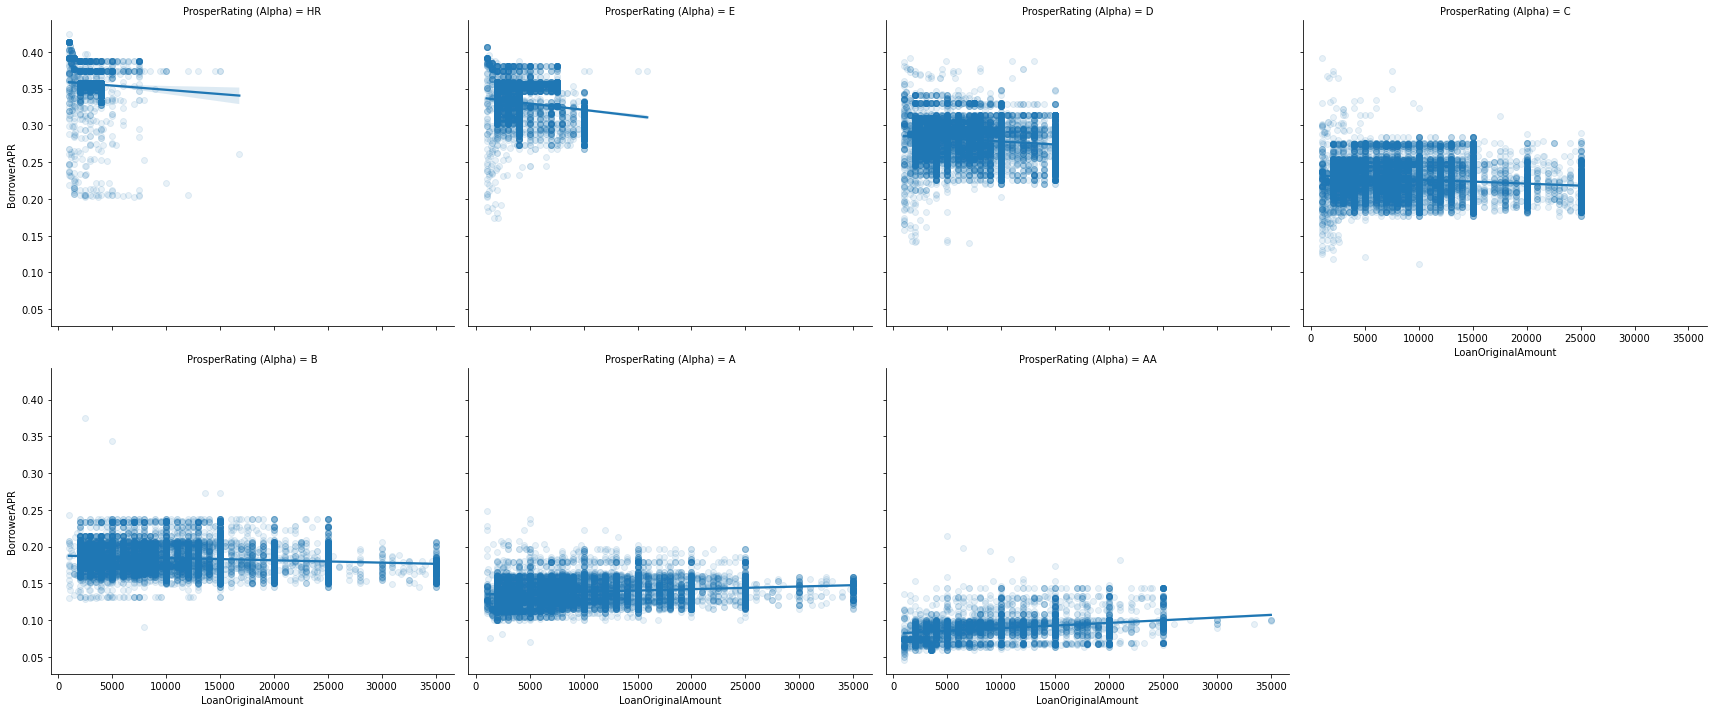

In [32]:
# Effect of ProsperRating (Alpha) on the relationship between BorrowerAPR and LoanOriginalAmount
g = sns.FacetGrid(data=prosper_sub, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

- The LoanOriginalAmount increases with better ProsperRating (Alpha) score. 

- The BorrowerAPR decreases with better ProsperRating (Alpha) score. 

- Interestingly, the relationship between Borrower APR and Loan Original Amount turns from negative to slightly positive when the Prosper Ratings are increased from HR to A or better. This may be because people with A or AA ratings tend to borrow more money, increasing APR could prevent them from borrowing even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

Next, I'll check the effect of BorrowerAPR across ProsperRating (Alpha) and Terms

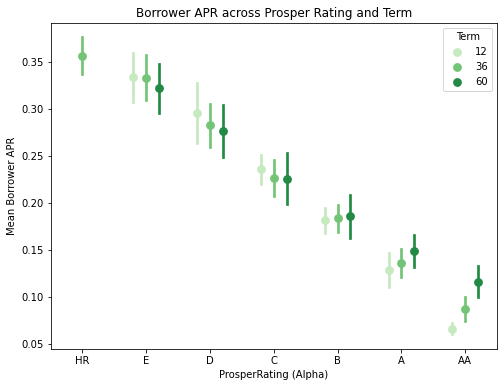

In [33]:
fig = plt.figure(figsize=[8, 6])
ax = sns.pointplot(data=prosper_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
                  palette='Greens', linestyles='', dodge=0.4, ci='sd')
plt.title('Borrower APR across Prosper Rating and Term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([], minor=True);

- It is noted that the BorrowerAPR decreases with the increase of Term for people with HR-C ProsperRatings. But for people with B-AA ratings, the BorrowerAPR increases with the increase of Term.

Next, I'll look at the ProsperRating and Term effects on StatedMonthlyIncome and LoanOriginalAmount variables

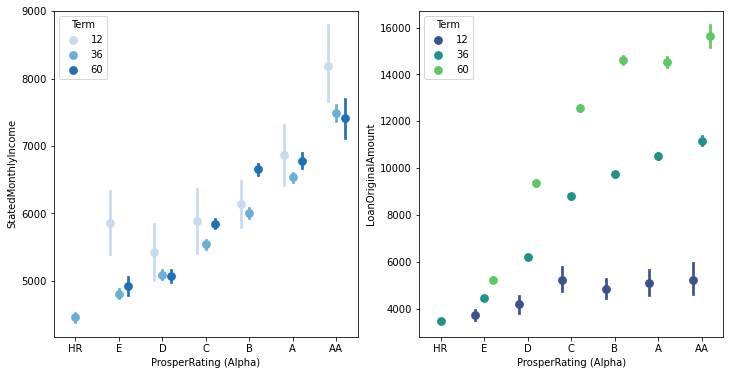

In [34]:
fig, ax = plt.subplots(ncols = 2, figsize = [12, 6])
sns.pointplot(data=prosper_sub, x='ProsperRating (Alpha)', y='StatedMonthlyIncome', hue='Term',
             palette='Blues', linestyles='', dodge=0.4, ax=ax[0])
sns.pointplot(data=prosper_sub, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='Term',
             palette='viridis', linestyles='', dodge=0.4, ax=ax[1]);

- For StatedMonthlyIncome, it seems like there's no interaction effect between Term and ProsperRating, that is, the pattern of Term is similar among different ProsperRatings. 

- In contrast, for LoanOriginalAmount, there is an interaction between Term and ProsperRating. It can be seen that with better ProsperRating, the LoanOriginalAmount of all three Terms increases, and the increase amplitude of LoanoriginalAmount between Terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I went deeper in my investigation of BorrowerAPR against LoanOriginalAmount by looking at the impact of the ProsperRating (Alpha). The multivariate exploration showed that the relationship between BorrowerAPR and LoanOriginalAmount turns from negative to slightly positive when the ProsperRatings increased from HR to AA. 

> Also, I explored the ProsperRating and Term effects on LoanOriginalAmount, and I discovered that, with better ProsperRating, the LoaOriginalAmount of all three terms increases, the increase amplitude of LoanOriginalAmount between terms also becomes larger.

### Were there any interesting or surprising interactions between features?

> The surprising interaction I noticed is that the BorrowerAPR and LoanOriginalAmount is negatively correlated when the ProsperRatings (Alpha) are from HR to B. But the correlation is turned to be positive when the ProsperRatings are A and AA. 

> The second interesting thing is that the BorrowerAPR decreases with the increase of loan Term for people with HR-C ratings. However, the BorrowerAPR increases with the loan Term for people with B-AA ratings.

## Conclusions


Conclusively, based on the explorative analyses and visualizations above, my hypothesis can be confirmed to be true that:

- The LoanOriginalAmount has a negative effect on the BorrowerAPR, that is, the larger the LoanOriginalAmount, the lower the BorrowerAPR.


- Also, the other features of interest in the dataset: StatedMonthlyIncome, loan term (Term), ProsperRating (Alpha), and EmploymentStatus all have effects on the BorrowerAPR, as speculated before the exploration.